
# Table of contents
 - Import Dependencies
 - Load and Visualize data
 - Build Model
 - Train Model
 - Evaluate Model
 - Final Evaluations

## Import Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path
import shutil
from collections import Counter
import keras 
import tensorflow as tf
from keras.layers import *
from keras.models import *
from IPython.display import Image
from keras import backend as K

Using TensorFlow backend.


## Load and Visualize data

In [2]:
path = "UTKFace/"
files = os.listdir(path)
#la lista dei file viene caricata in modo arbitratrio, quindi la ordino per conformarla
files.sort()
size = len(files)
print("Numero di immagini presenti del dataset:",size) 

Numero di immagini presenti del dataset: 23695


In [3]:
print("Formato dei file: age_gender_ethnicity_datetime\n")
print(files[0])

Formato dei file: age_gender_ethnicity_datetime

100_0_0_20170112213500903.jpg.chip.jpg


In [4]:
#Lettura e preprocessing delle immagini;
#Oltre alle immagini verranno estratte anche le altre feature disponibili.

images = []
ages = []
genders = []
ethnicities = [] 

IMG_WIDTH= 80
IMG_HEIGHT = 80

for file in files:
    #image = cv2.imread(path + file, cv2.IMREAD_COLOR)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.imread(path + file, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, dsize=(IMG_HEIGHT,IMG_WIDTH))
    image = image.reshape((image.shape[0],image.shape[1],1))
    #image = image.reshape((image.shape[0],image.shape[1],3))
    images.append(image)
    split_var = file.split('_')
    ages.append(int(split_var[0]))
    genders.append(int(split_var[1]))
    ethnicities.append(int(split_var[2]))
    


In [5]:
#shape di un'immagine
images[1].shape

(80, 80, 1)

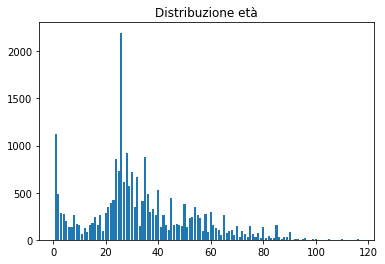

Max value: 116
Min value: 1


In [6]:
#Grafico della distribuzione età
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.title('Distribuzione età')
plt.show()
print("Max value:",max(ages))
print("Min value:",min(ages))

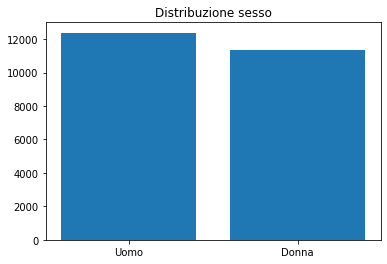

Uomini:  12379
Donne:  11316


In [7]:
#Grafico della distribuzione sesso
sesso = ['Uomo','Donna']
x_genders = list(set(genders))
y_genders = [genders.count(i) for i in x_genders]
plt.bar(sesso,y_genders)
plt.title('Distribuzione sesso')
plt.show()
print("Uomini: ",y_genders[0])
print("Donne: ",y_genders[1])

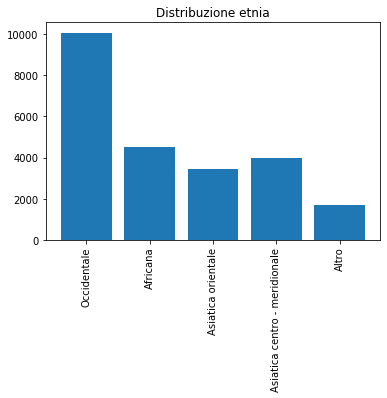

Occidentale:  10070
Africana:  4526
Asiatica orientale:  3431
Asiatica centro-meridionale:  3976
Altro:  1692


In [8]:
#Grafico della distribuzione etinia
etnia = ['Occidentale','Africana','Asiatica orientale','Asiatica centro - meridionale', 'Altro']
x_ethnicities = list(set(ethnicities))
y_ethnicities = [ethnicities.count(i) for i in x_ethnicities]
plt.bar(etnia,y_ethnicities)
plt.xticks(rotation = 90)
plt.title('Distribuzione etnia')
plt.show()

print("Occidentale: ",y_ethnicities[0])
print("Africana: ",y_ethnicities[1])
print("Asiatica orientale: ",y_ethnicities[2])
print("Asiatica centro-meridionale: ",y_ethnicities[3])
print("Altro: ",y_ethnicities[4])

Nome file: 100_0_0_20170112215240346.jpg.chip.jpg
Età: 100
Sesso: 0
Etnia: 0


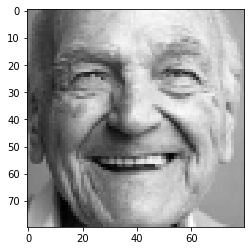

In [10]:
#funzione per lo show di un'immagine. 
def display(img):
    img = np.squeeze(img)  #squeeze remove single-dimensional entries from the shape of an array.
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.show()

idx = 1
sample = images[idx]
print("Nome file:",files[idx])
print("Età:",ages[idx])
print("Sesso:",genders[idx])
print("Etnia:",ethnicities[idx])
display(images[idx])

In [11]:
#Creazione di un'unica lista contenente le feature associate alle immagini
features = []

for i in range(size):
    
    featElement = np.array([int(genders[i]),int(ethnicities[i])])
    features.append(featElement)

features = np.asarray(features)

In [12]:
#Normalizzazione delle immagini
if 'target' not in locals():
    target = ages
    images = np.array(images)
    images = images / 255

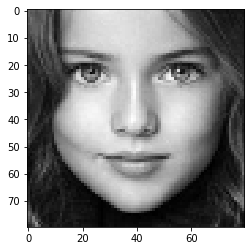

Nome file: 10_1_0_20170109203438428.jpg.chip.jpg
Età: 10
Sesso: 1
Etnia: 0


In [13]:
#Altro esempio
idx=120
display(images[idx])
print("Nome file:",files[idx])
print("Età:",target[idx])
print("Sesso:",features[idx][0])
print("Etnia:",features[idx][1])

In [14]:
#split dei dati
#oltre ai soliti primi 4 parametri, inserisco name_train e name_test per inserire i nomi dei file per poterli dividere in cartelle
images_train, images_test, feat_train, feat_test, y_train, y_test, fileName_train, fileName_test = train_test_split(images, features, target, files, test_size=0.2,random_state=42,shuffle=True)
print("Samples in Training:",images_train.shape[0])
print("Samples in Testing:",images_test.shape[0])


Samples in Training: 18956
Samples in Testing: 4739


In [15]:
#controllo se le cartelle test e training sono già presenti
print("Cartella training?",os.path.isdir("training"))
print("Cartella test?",os.path.isdir("test"))


#controllo se i dati sono già presenti nelle cartelle (non è la prima esecuzione del codice)
firstExec = True
#DA MIGLIORARE EFFICIENZA
if((os.path.isdir("training")) and (os.path.isdir("test"))):
    trElements = os.listdir("training/")
    teElements = os.listdir("test/")
    if((Counter(fileName_train) == Counter(trElements)) and (Counter(fileName_test) == Counter(teElements))):
        firstExec = False

print("Prima esecuzione?",firstExec)

Cartella training? True
Cartella test? True
Prima esecuzione? False


In [16]:
#se è la prima esecuzione creo le cartelle e vi inserisco i file        
if(firstExec):
    #creo la cartella dove inserire le immagini di training
    Path("training").mkdir(parents=True, exist_ok=True)
    
    #copio le immagini di training
    for i in range(0,images_train.shape[0]):
        shutil.copy(path+fileName_train[i],"training/"+fileName_train[i])
    trElements = os.listdir("training/")
    #print(set(name_train).symmetric_difference(set(trElements)))
    assert Counter(fileName_train) == Counter(trElements),set(fileName_train).symmetric_difference(set(trElements))
    
    #creo la cartella dove inserire le immagini di test
    Path("test").mkdir(parents=True, exist_ok=True)
    #copio le immagini di test
    for i in range(0,images_test.shape[0]):
        shutil.copy(path+fileName_test[i],"test/"+fileName_test[i])
    teElements = os.listdir("test/")
    assert Counter(fileName_test) == Counter(teElements),set(fileName_test).symmetric_difference(set(teElements))
    

## Build Model

#### Nella costruzione della CNN sono state effettuate varie prove, considerando diversi livelli convoluzionali e diverse percentuali di dropout. Inoltre, sono state effettuate ulteriori prove considerando le feature sesso ed etnia oltre alle sole immagini.

In [39]:
#Funzione per la creazione di un modello
def create_cnn_model():

    #inputs = Input(shape=(IMG_HEIGHT,IMG_WIDTH,3))
    inputs = Input(shape=(IMG_HEIGHT,IMG_WIDTH,1))
    conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
    conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
    #x = MaxPooling2D(pool_size=(2, 2))(conv3)
    x = Dropout(0.15)(pool2)
        
    x = Flatten()(x) 
    
    #shape degli attributi numerici
    #featureShape = Input(shape=(2,)) #Shape nel caso in cui si considera sesso ed etnia
    #featureShape = Input(shape=(1,)) #Shape nel caso in cui si considera sesso ed etnia
    #x = keras.layers.Concatenate(axis=1)([x, featureShape]) #Concatenazione delle altre feature alle immagini
    
    #dropout = Dropout(0.15)
    age_model = Dense(128, activation='relu')(x)
    #age_model = dropout(age_model)
    age_model = Dense(64, activation='relu')(age_model)
    #age_model = dropout(age_model)
    age_model = Dense(32, activation='relu')(age_model)
    #age_model = dropout(age_model)
    age_model = Dense(1, activation='relu')(age_model)
   
        
    # Costruzione della CNN
    #model = Model([inputs, featureShape], age_model) 
    model = Model(inputs, age_model)
    model.compile(optimizer = 'adam', loss ='mae', metrics =['accuracy'])
   
    # Restituiamo la CNN creata
    return model        

In [40]:
#istanziamo un modello chiamando la funzione sopra definita
model = create_cnn_model()

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 80, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 78, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 128)       0   

## Train Model

#### - Tramite il seguente codice abbiamo automatizzato il training e il salvataggio delle informazioni dei vari modelli addestrati. 
#### - Per ogni modello creato ne abbiamo fatto il training considerando un numero di epoche crescente.
#### - Ad ogni iterazione confrontavamo l'ultimo modello addestrato con il best model che avevamo a disposizione. Il confronto è stato fatto sulla loss.
#### - Alla fine del ciclo for esterno vengono salvate tutta una serie di informazioni riguardanti il modello che ha presentato la loss più bassa. 



In [ ]:
# Training del modello 
#batch_size = [128] dimensione del batch size utilizzata
#nb_epoch = [25, 40, 80, 100, 200, 500] numero di epoche utilizzate nelle varie prove

batch_size = [128]
nb_epoch = [200]
history_list = []
best_model= None
best_model = create_cnn_model()
#hist_best_model = best_model.fit(x = [images_train, feat_train], y = y_train, epochs = 1, batch_size = 250, validation_split=0.1, shuffle=True)
hist_best_model = best_model.fit(x = images_train, y = y_train, epochs = 1, batch_size = 250, validation_split=0.1, shuffle=True)
    
for batch in batch_size:
    for epoch in nb_epoch:
            print('epoch:',epoch,'batch:',batch)
            model = None
            model = create_cnn_model()
            #hist_model = model.fit(x = [images_train, feat_train], y = y_train, epochs = epoch, batch_size = batch, validation_split=0.1, shuffle=True)
            hist_model = model.fit(x = images_train, y = y_train, epochs = epoch, batch_size = batch, validation_split=0.1, shuffle=True)
            history_list.append(hist_model.history)
            
            mod_loss = np.mean(hist_model.history['loss'])
            mod_val_loss = np.mean(hist_model.history['val_loss'])
            mod_accuracy = np.mean(hist_model.history['accuracy'])
            best_mod_loss = np.mean(hist_best_model.history['loss'])
            print(mod_loss, best_mod_loss)
            
            if (mod_loss < best_mod_loss):
                best_model = model
                hist_best_model = hist_model
                
model_path = "img_200_0.15_3CL_0.01"
Path("Modelli/"+model_path).mkdir(parents=True, exist_ok=True)
best_model.save('Modelli/'+model_path+"/"+model_path+".h5")


## Evaluate Model

In [ ]:
# summarize history for loss
plt.plot(hist_best_model.history['loss'])
plt.plot(hist_best_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Modelli/"+model_path+"/"+"model loss")
plt.show()

# summarize history for accuracy
plt.plot(hist_best_model.history['accuracy'])
plt.plot(hist_best_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Modelli/"+model_path+"/"+"model accuracy")
plt.show()


#y = np.reshape(feat_test,(1,))
y_prova = np.asarray(y_test)
#result_evaluate = best_model.evaluate([images_test, feat_test], y_prova)
result_evaluate = best_model.evaluate(images_test, y_test)


#Salvataggio informazioni modello
f= open("Modelli/"+model_path+"/result.txt","w+")
f.write("Train loss: "+ str(mod_loss)+"\n")
f.write("val_loss: " + str(mod_val_loss)+"\n")
f.write("Train accuracy: "+ str(mod_accuracy)+"\n")
f.write("Test loss: "+str(result_evaluate[0])+"\n")
f.write("Test accuracy: "+str(result_evaluate[1])+"\n")
f.close()
tf.keras.utils.plot_model(best_model, "Modelli/"+model_path+"/model.png",show_shapes=True) 
np.save("Modelli/"+model_path+"/hist.npy",hist_best_model)

# Final evaluations

In [15]:
# Carichiamo uno dei modelli precedentemente addestrati
# Il modello caricato risulta essere quello con la loss più bassa
loaded_model= tf.keras.models.load_model("Modelli/img_200_0.15_3CL_0.2.h5")

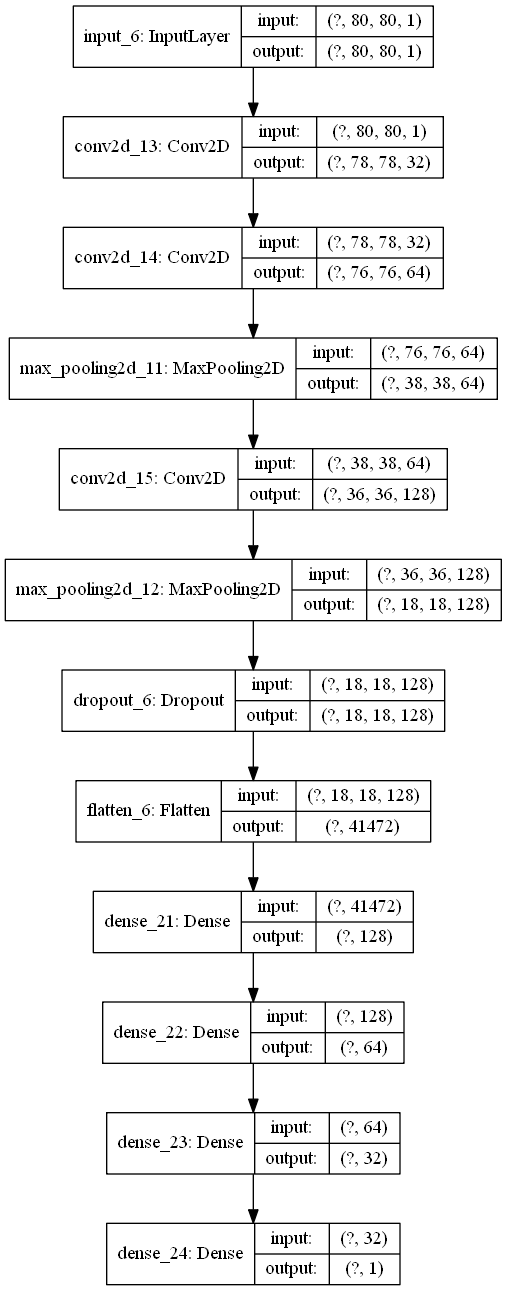

In [16]:
#Struttura del modello utilizzato
Image("model.png")

In [17]:
# Caricare l'history del modello
hist_model = np.load("hist.npy",allow_pickle = True).item()

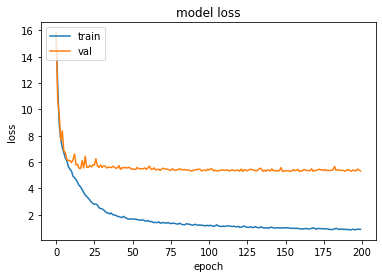

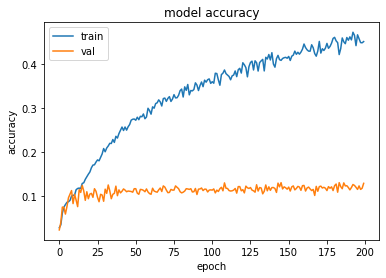

In [18]:
# summarize history for loss
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(hist_model.history['accuracy'])
plt.plot(hist_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
#Effettuiamo il predict sulle 4739 immagini del test set
predictions_age = loaded_model.predict(images_test)
predictions_age = np.squeeze(predictions_age)

In [20]:
#Per una più facile lettura dei grafici selezioniamo solo le prime 1000 prediction
subset_predictions_age = predictions_age[0:1000]
real_age = y_test[0:1000]

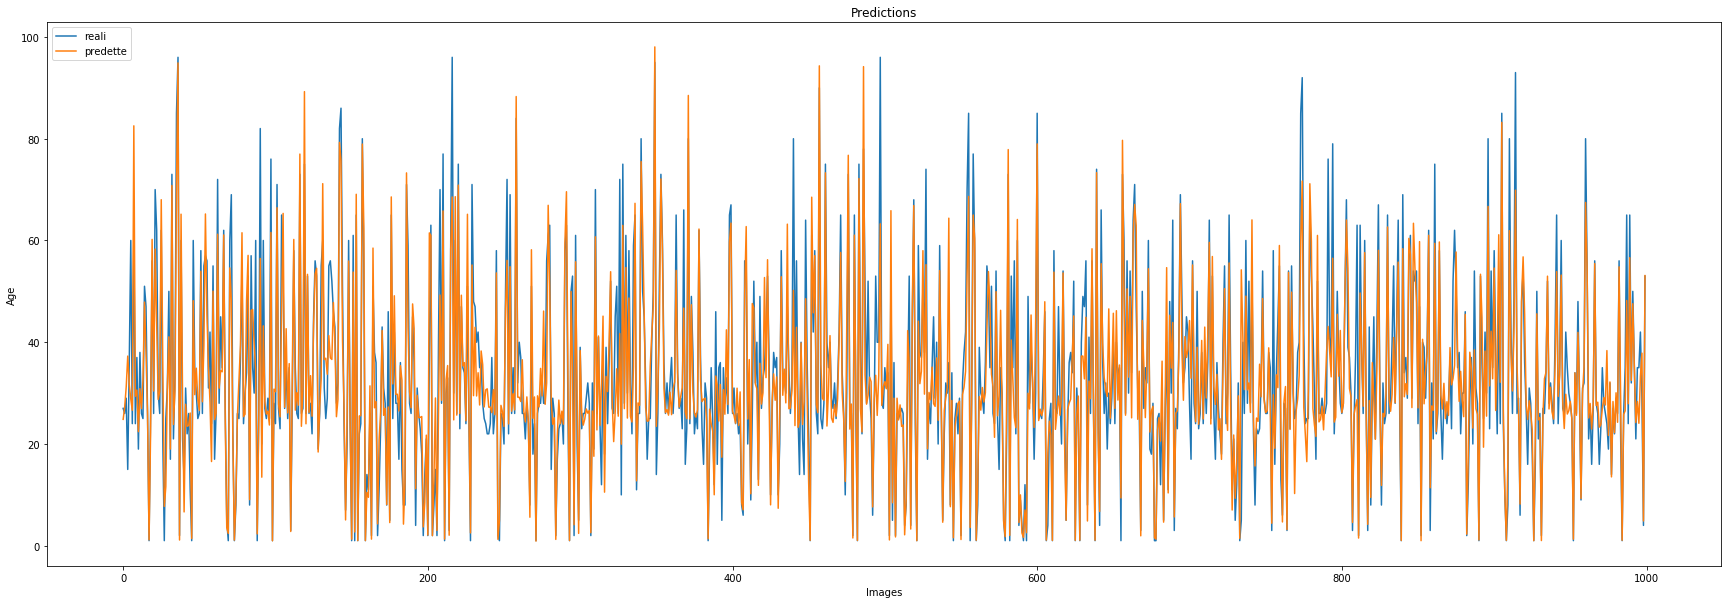

In [21]:
#Grafico dei valori predetti rispetto ai valori reali
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(1,1,1)
plt.plot(real_age)
plt.plot(subset_predictions_age)
plt.title('Predictions')
plt.ylabel('Age')
plt.xlabel('Images')
plt.legend(['reali', 'predette'], loc='upper left')

plt.show()

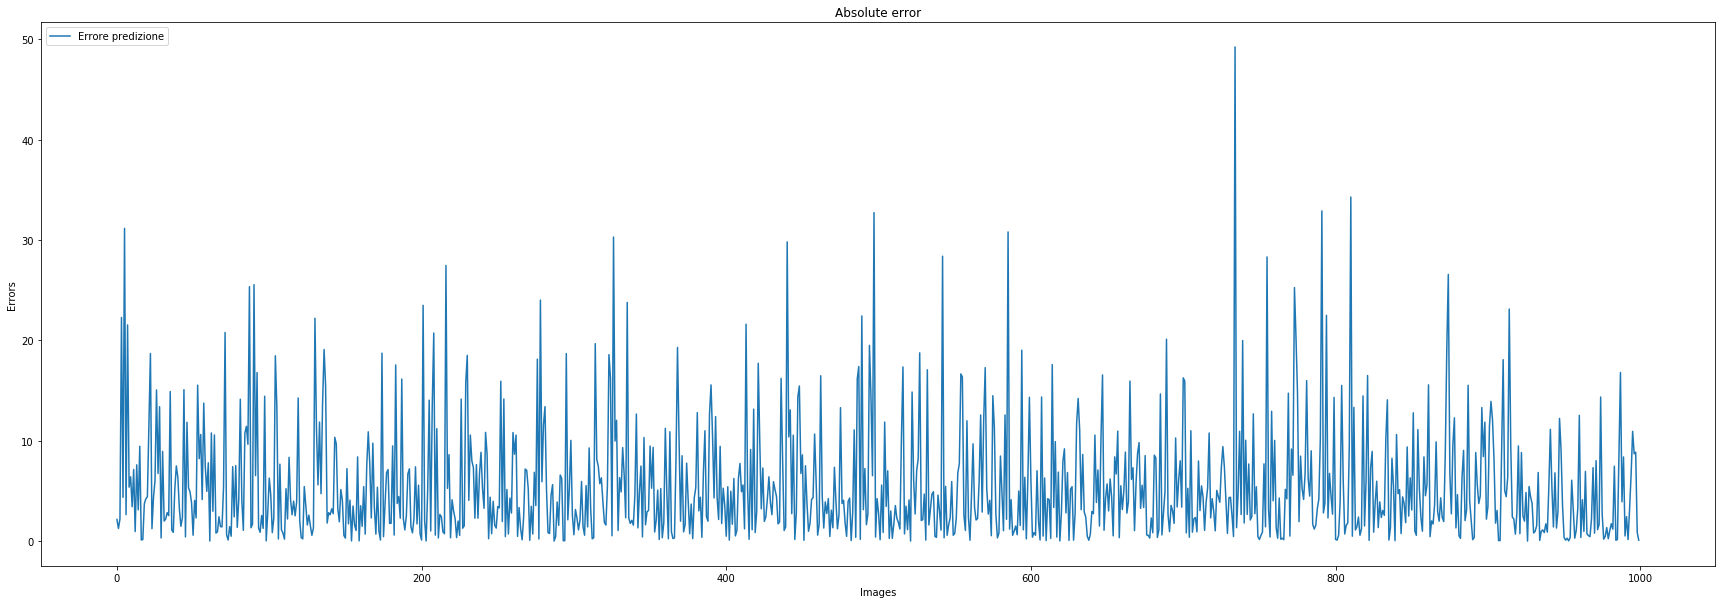

In [22]:
#l'array dist conterrà la differenza assoluta tra volori reali e valori predetti.
dist = abs(real_age - subset_predictions_age)

fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(1,1,1)
plt.plot(dist)
plt.title('Absolute error')
plt.ylabel('Errors') #Gli errori sono espressi in anni.
plt.xlabel('Images')
plt.legend(['Errore predizione'], loc='upper left')
plt.show()

In [23]:
#Stampiamo l'errore medio commesso dalla rete sulle prime 1000 immagini del test set
print("Errore medio: ",np.mean(dist))

Errore medio:  5.567657354176045


In [24]:
#Stampiamo gli indici delle immagini del test set(le prime 1000 immagini) per i quali si è registrato un errore ≥ di 40 anni.
print(np.where(dist >= 30))

(array([  5, 326, 497, 585, 734, 791, 810]),)


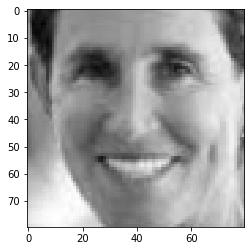

Nome immagine:  5_1_0_20170104202352685.jpg.chip.jpg
Età reale:  5
Età predetta:  54.228626
Errore (in anni):  49.2286262512207


In [25]:
#Prendendo l'immagine con indice 734 risulta che:
# - il soggetto nel dataset risulta avere 5 anni;
# - la rete neurale convoluzionale gli ha associato circa 54 anni;
# - tale immagine risulta essere quella (tra tutte le immagini del test set) su cui la rete ha commesso l'errore più alto.


#Pertanto l'errore così alto in questo caso è dovuto ad un'immagine non catalogata correttamente dai creatori del dataset.

idx=734
display(images_test[idx])
print("Nome immagine: ",fileName_test[idx])
print("Età reale: ", y_test[idx])
print("Età predetta: ",subset_predictions_age[idx])
print("Errore (in anni): ", abs(real_age[idx] - subset_predictions_age[idx]))

In [26]:
#Poiché la mediana non è influenzata dai valori anomali calcoliamo la mediana di dist
asc_dist = np.sort(dist)
print("Errore mediano: ",np.median(asc_dist))

Errore mediano:  3.7465314865112305


#### Come ci aspettavamo la mediana (3.74) risulta essere inferiore alla media (5.56), in quanto, quest'ultima risulta essere influenzata dagli outliers.

In [27]:
#Calcoliamo l'errore medio e la mediana di tutte le 4739 immagini di test
dist = abs(y_test - predictions_age)
print("Errore medio: ",np.mean(dist))
print("Errore mediano: ",np.median(dist))

Errore medio:  5.51857614934784
Errore mediano:  3.640911102294922


L'errore medio e mediano delle prediction effettuate sull'intero test set (4739 immagini) risultano essere ancora più bassi rispetto all'errore medio e mediano calcolato solo sulle prime 1000 immagini del test set.

### Analizziamo i risultati di qualcun' altra immagine del test set:

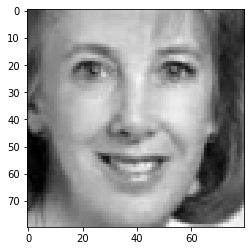

Nome immagine:  40_1_0_20170117171511139.jpg.chip.jpg
Età reale:  40
Età predetta:  41.33919


In [28]:
#Selezioniamo qualche immagine del test set e confrontiamo il valore predetto con il valore reale
idx=735
display(images_test[idx])
print("Nome immagine: ",fileName_test[idx])
print("Età reale: ", y_test[idx])
print("Età predetta: ",predictions_age[idx])

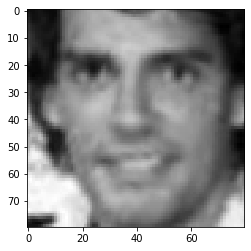

Nome immagine:  27_0_4_20170103235800445.jpg.chip.jpg
Età reale:  27
Età predetta:  27.841112


In [29]:
idx=102
display(images_test[idx])
print("Nome immagine: ",fileName_test[idx])
print("Età reale: ", y_test[idx])
print("Età predetta: ",predictions_age[idx])

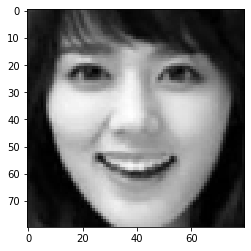

Nome immagine:  24_1_2_20170116174534993.jpg.chip.jpg
Età reale:  24
Età predetta:  25.13591


In [30]:
idx=3550
display(images_test[idx])
print("Nome immagine: ",fileName_test[idx])
print("Età reale: ", y_test[idx])
print("Età predetta: ",predictions_age[idx])

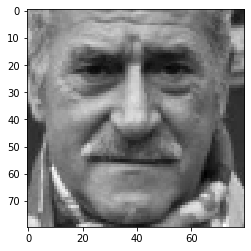

Nome immagine:  75_0_0_20170111200622706.jpg.chip.jpg
Età reale:  75
Età predetta:  73.45395


In [31]:
idx=2348
display(images_test[idx])
print("Nome immagine: ",fileName_test[idx])
print("Età reale: ", y_test[idx])
print("Età predetta: ",predictions_age[idx])

#### Come si può osservare, l'età predetta risulta essere molto vicina a quella reale.

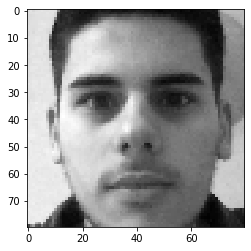

Età reale: 22
Età predetta:  26.53496


In [37]:
#Infine, proviamo con una nostra immagine
image = cv2.imread("domenico.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, dsize=(IMG_HEIGHT,IMG_WIDTH))
image = image.reshape((-1,image.shape[0],image.shape[1],1))
image = image/255
display(image)

print("Età reale: 22")
print("Età predetta: ",loaded_model.predict(image)[0][0])